In [1]:
import pandas as pd
data=pd.read_csv('C:\\Users\\nEW u\\Desktop\\DataSEts\\Book2(titanic_datasets_D.T).csv')
data.head(3)

,passengerId,survived,pclass,name,Sex,Age,sibsp,parch,ticket,fare,cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
import seaborn as sns

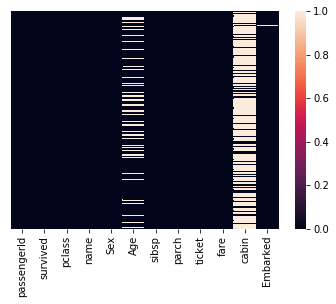

In [3]:
sns.heatmap(data.isnull(),yticklabels=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerId    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data.describe()

,passengerId,survived,pclass,Age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.corr()

,passengerId,survived,pclass,Age,sibsp,parch,fare
passengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
data.columns

Index(['passengerId', 'survived', 'pclass', 'name', 'Sex', 'Age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'Embarked'],
      dtype='object')

In [8]:
x=data.drop(['passengerId','sibsp','parch','name','ticket','cabin','Embarked'], axis='columns')

In [9]:
x.head(1)

,survived,pclass,Sex,Age,fare
0,0,3,male,22.0,7.25


In [10]:
x.Age.mean()

29.69911764705882

In [11]:
x['Age']=x['Age'].fillna(x['Age'].mean())

In [12]:
x.Age.isnull().sum()

0

In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
survived    891 non-null int64
pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
fare        891 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [14]:
x.Sex=x.Sex.map({'male' : 1, 'female' : 0})

In [15]:
x.Sex.unique()

array([1, 0], dtype=int64)

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
survived    891 non-null int64
pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
fare        891 non-null float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [17]:
x.columns

Index(['survived', 'pclass', 'Sex', 'Age', 'fare'], dtype='object')

In [18]:
X=x.drop(['survived'],axis='columns')
y=x.survived

In [19]:
X.columns

Index(['pclass', 'Sex', 'Age', 'fare'], dtype='object')

In [20]:
len(X), len(y)

(891, 891)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [23]:
len(X_train) ,len(X_test)

(623, 268)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
model.score(X_test,y_test)

0.7798507462686567

In [27]:
y_pred=model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[137,  29],
       [ 30,  72]], dtype=int64)

In [29]:
import seaborn as sns

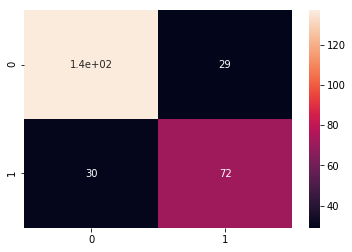

In [30]:

sns.heatmap(cm, annot=True)

In [32]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.83      0.82       166
          1       0.71      0.71      0.71       102

avg / total       0.78      0.78      0.78       268

